## Pacotes para Análise de dados

In [1]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Importação de dados

In [3]:
fb = pd.read_csv('data/facebook.csv')
ms = pd.read_csv('data/microsoft.csv')

In [4]:
print(type(fb))

<class 'pandas.core.frame.DataFrame'>


## Conversão a coluna "Date" para o formato datetime

In [5]:
fb["Date"] = pd.to_datetime(fb["Date"])

# Definir "Date" como índice
fb.set_index("Date", inplace=True)

## Noções Básicas de DataFrame

In [6]:
# Apresentar as cinco linhas do DataFrame
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [7]:
# Apresentar as ultimas cinco linhas do DataFrame
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000


In [8]:
# Fornecer algumas estatisticas resumidas
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,25.525000,26.085000,24.845000,25.475000,25.134512,7.215200e+06
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


In [9]:
fb.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700


### Atributos do DataFrame

#### IPC! O índice pode ser os números das linhas (padrão) ou algum outro identificador, como datas em séries temporais.

In [10]:
# retorna os índices do DataFrame. 
fb.index

DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05'],
              dtype='datetime64[ns]', name='Date', length=780, freq=None)

In [11]:
# Retornar o primeiro valor do índice.
fb.index[0]

Timestamp('2014-12-31 00:00:00')

In [12]:
# Retornar o último valor do índice
fb.index[-1]

Timestamp('2018-02-05 00:00:00')

In [13]:
# Retornar o nome de todas as colunas do DataFrame
fb.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
# Apresentar o numero de linhas e colunas dos dados.
fb.shape

(780, 6)

### Seleção de Dados do DataFrame (Slicing DataFrame)

In [15]:
#Fechamento do valor de ação no dia 05/01/2015
fb.loc['2015-01-05', 'Low']

19.700001

In [16]:
#Fechamento do valor de ação no dia 05/01/2015
fb.iloc[2,2] # A posição inicia em 0

19.700001

In [17]:
#Fechamento do valor de ação no ano de 2015
fb.loc['2015-01-05':'2015-12-31','Low']

Date
2015-01-05    19.700001
2015-01-06    19.170000
2015-01-07    19.080000
2015-01-08    19.350000
2015-01-09    19.660000
                ...    
2015-12-24    32.910000
2015-12-28    32.360001
2015-12-29    33.070000
2015-12-30    33.380001
2015-12-31    32.959999
Name: Low, Length: 251, dtype: float64

<Axes: xlabel='Date'>

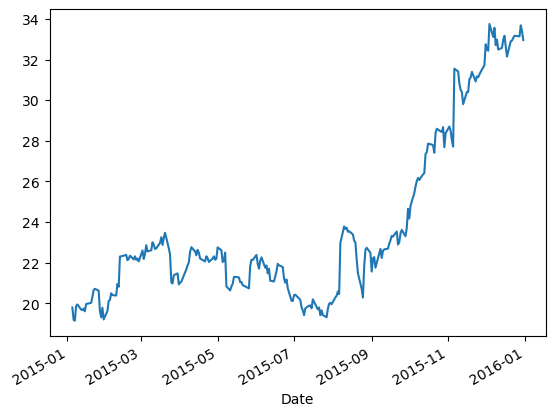

In [18]:
# Visualizando o stock price (valor da ação) de 2015
fb.loc['2015-01-05':'2015-12-31','Close'].plot()

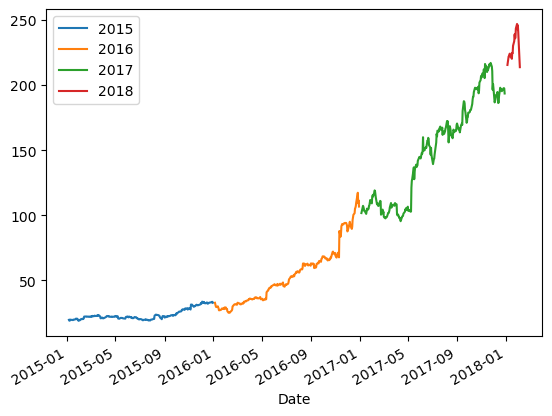

In [19]:
# Visulizando o stock price entre 2015 - 2018
fb.loc['2015-01-05':'2015-12-31','Close'].plot(label = '2015')
fb.loc['2016-01-05':'2016-12-31','Close'].plot(label = '2016')
fb.loc['2017-01-05':'2017-12-31','Close'].plot(label = '2017')
fb.loc['2018-01-05':'2018-12-31','Close'].plot(label = '2018')

plt.legend()

## Novas Variáveis no Dataframe

### Adicionar Novas Colunas

In [20]:
# Selecionar colunas específicas (ex.: coluna "close")
fb['Close']

Date
2014-12-31     20.049999
2015-01-02     20.129999
2015-01-05     19.790001
2015-01-06     19.190001
2015-01-07     19.139999
                 ...    
2018-01-30    242.720001
2018-01-31    245.800003
2018-02-01    240.500000
2018-02-02    233.520004
2018-02-05    213.699997
Name: Close, Length: 780, dtype: float64

In [21]:
# Selecionar várias colunas
fb[['Open', 'Close']]

,Open,Close
Date,,
2014-12-31,20.400000,20.049999
2015-01-02,20.129999,20.129999
2015-01-05,20.129999,19.790001
2015-01-06,19.820000,19.190001
2015-01-07,19.330000,19.139999
...,...,...
2018-01-30,241.110001,242.720001
2018-01-31,245.770004,245.800003
2018-02-01,238.520004,240.500000


In [22]:
# Adicionar uma nova coluna
fb['Prince1'] = fb['Close'].shift(-1)
fb.head(10)

,Open,High,Low,Close,Adj Close,Volume,Prince1
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500,19.940001
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500,19.690001
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300,19.660000
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700,19.740000


### Prince Difference

In [23]:
# Variação entre o fechamento do dia anterior com a abertura do valor presente da ação
fb['PriceDiff'] = fb['Prince1'] - fb['Close']

fb.head(10)

,Open,High,Low,Close,Adj Close,Volume,Prince1,PriceDiff
Date,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500,19.940001,0.080000
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500,19.690001,-0.250000
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300,19.660000,-0.030001
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700,19.740000,0.080000


### Daily Return 

A diferença entre o valor de fechamento da ação com o valor presente da abertura 

In [24]:
# Retorno Diário (Daily Return)
fb['Return'] = fb['PriceDiff'] / fb['Close']

# Exibir os valores formatados como porcentagem
fb['Return'] = fb['Return'].map(lambda x: f"{x:.3f}%")

fb.head(10)

,Open,High,Low,Close,Adj Close,Volume,Prince1,PriceDiff,Return
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.004%
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.017%
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030%
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.003%
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.038%
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500,19.940001,0.080000,0.004%
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500,19.690001,-0.250000,-0.013%
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300,19.660000,-0.030001,-0.002%
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700,19.740000,0.080000,0.004%


### Direction - List Comprehension

É uma ferramenta muito importante para a criação de novas variáveis seguindo regras complicadas

In [25]:
fb['Direction'] = [1 if fb.loc[ei, 'PriceDiff'] > 0 else -1 # Dará o valor "1" para Direction se PrinceDiff for positivo, caso contrário -1
                  for ei in fb.index] # Define o dominio que essa opração será realizada

fb.head()

,Open,High,Low,Close,Adj Close,Volume,Prince1,PriceDiff,Return,Direction
Date,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.004%,1
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.017%,-1
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030%,-1
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.003%,-1
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.038%,1


### Moving Average (Média Móvel)

Apresenta o preço médio da ação em um número definido de dias. Usado em negociação de ações. 

In [26]:
# Calcular a média móvel do preço de fechamento em três dias
fb['Average3d'] = (fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

fb.head(10)

,Open,High,Low,Close,Adj Close,Volume,Prince1,PriceDiff,Return,Direction,Average3d
Date,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.004%,1,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.017%,-1,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030%,-1,19.990000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.003%,-1,19.703334
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.038%,1,19.373334
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500,19.940001,0.080000,0.004%,1,19.396667
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500,19.690001,-0.250000,-0.013%,-1,19.646667
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300,19.660000,-0.030001,-0.002%,-1,19.830001
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700,19.740000,0.080000,0.004%,1,19.763334


In [27]:
# Método para calcular a média móvel em qualquer numero de dias using.rolling()
fb['M.A.40'] = fb['Close'].rolling(40).mean()

fb.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Prince1,PriceDiff,Return,Direction,Average3d,M.A.40
Date,,,,,,,,,,,,
2018-01-23,235.850006,239.830002,235.100006,238.910004,238.910004,11880700,235.800003,-3.110001,-0.013%,-1,234.236669,205.710500
2018-01-24,239.039993,240.490005,233.550003,235.800003,235.800003,14499300,236.350006,0.550003,0.002%,1,236.133336,206.181500
2018-01-25,238.000000,239.750000,235.750000,236.350006,236.350006,10247100,243.330002,6.979996,0.030%,1,237.020004,206.736750
2018-01-26,238.119995,243.339996,237.600006,243.330002,243.330002,12908900,246.850006,3.520004,0.014%,1,238.493337,207.552250
2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900,242.720001,-4.130005,-0.017%,-1,242.176671,208.813000
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.013%,1,244.300003,209.863250
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.022%,-1,245.123337,211.066251
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029%,-1,243.006668,212.412250
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.085%,-1,239.940002,213.556750


In [28]:
fb['M.A.200'] = fb['Close'].rolling(200).mean()

fb.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Prince1,PriceDiff,Return,Direction,Average3d,M.A.40,M.A.200
Date,,,,,,,,,,,,,
2018-01-23,235.850006,239.830002,235.100006,238.910004,238.910004,11880700,235.800003,-3.110001,-0.013%,-1,234.236669,205.710500,169.57280
2018-01-24,239.039993,240.490005,233.550003,235.800003,235.800003,14499300,236.350006,0.550003,0.002%,1,236.133336,206.181500,170.25015
2018-01-25,238.000000,239.750000,235.750000,236.350006,236.350006,10247100,243.330002,6.979996,0.030%,1,237.020004,206.736750,170.94305
2018-01-26,238.119995,243.339996,237.600006,243.330002,243.330002,12908900,246.850006,3.520004,0.014%,1,238.493337,207.552250,171.66910
2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900,242.720001,-4.130005,-0.017%,-1,242.176671,208.813000,172.41680
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,0.013%,1,244.300003,209.863250,173.15295
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,-0.022%,-1,245.123337,211.066251,173.88580
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,-0.029%,-1,243.006668,212.412250,174.59185
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,-0.085%,-1,239.940002,213.556750,175.26105


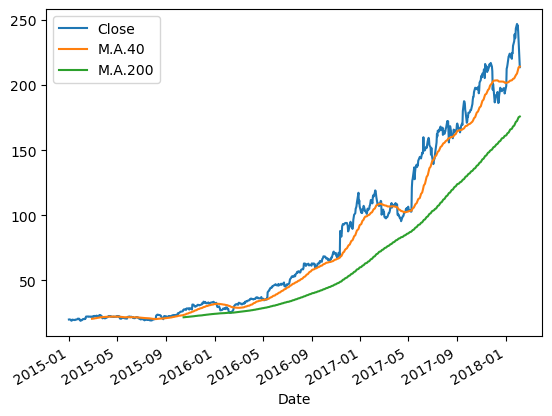

In [29]:
# Comparar a média móvel com o preço de fechamento
fb['Close'].plot()
fb['M.A.40'].plot() # É um sinal rápido (Laranja)
fb['M.A.200'].plot() # É um sinal lento (Verde)
plt.legend() # Adiciona Legenda

# Quando M.A.40 > M.A.200 os Trend Following acreditam que o preço da ação subirá por algum tempo

## Estratégia de Negociação Simples

### Strategy - Fast Signal and Slow Signal

In [ ]:
ms['M.A.10'] = ms['Close'].rolling[10].mean() # Fast Signal
ms['M.A.50'] = ms['Close'].rolling[50].mean() # Slow Signal